In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import matplotlib.dates as mdates

import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('monthly-car-sales.csv')

In [3]:
df

Month  Sales
0    1960-01   6550
1    1960-02   8728
2    1960-03  12026
3    1960-04  14395
4    1960-05  14587
..       ...    ...
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577

[108 rows x 2 columns]

<AxesSubplot:>

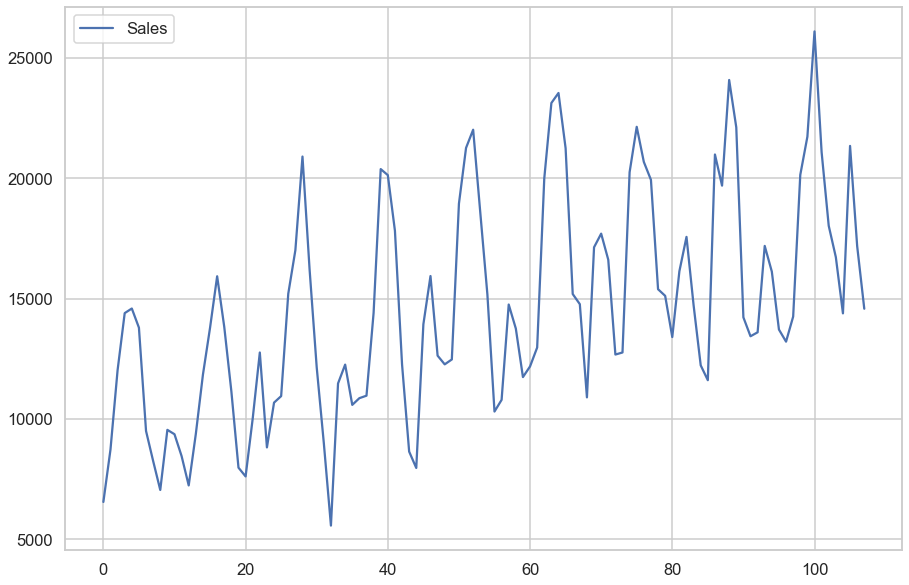

In [4]:
df.plot()

<AxesSubplot:xlabel='Month'>

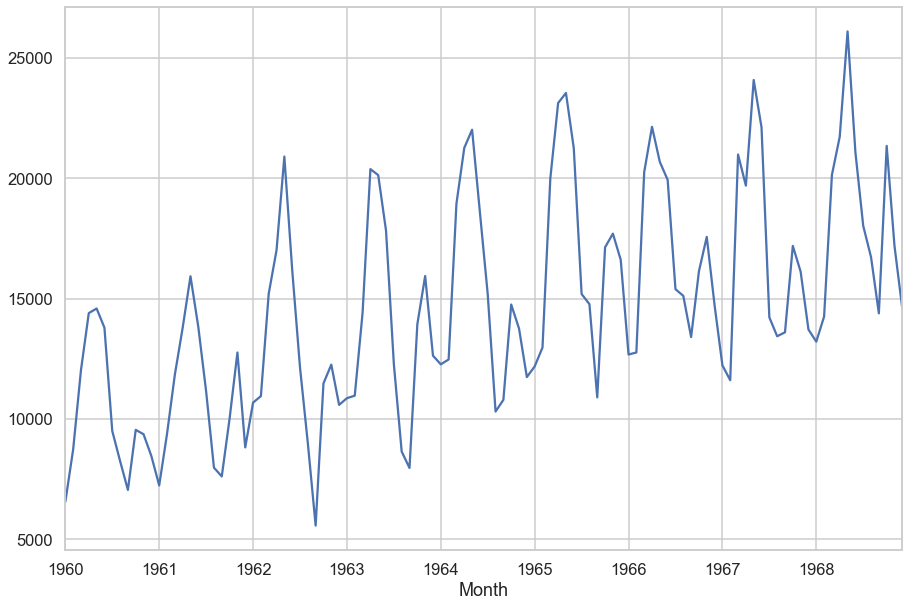

In [5]:
s = pd.Series(index = pd.to_datetime(df['Month']), data = df['Sales'].values)
s.plot()

In [6]:
s

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
              ...  
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Length: 108, dtype: int64

In [7]:
result = seasonal_decompose(s, model='additive')

<AxesSubplot:xlabel='Month'>

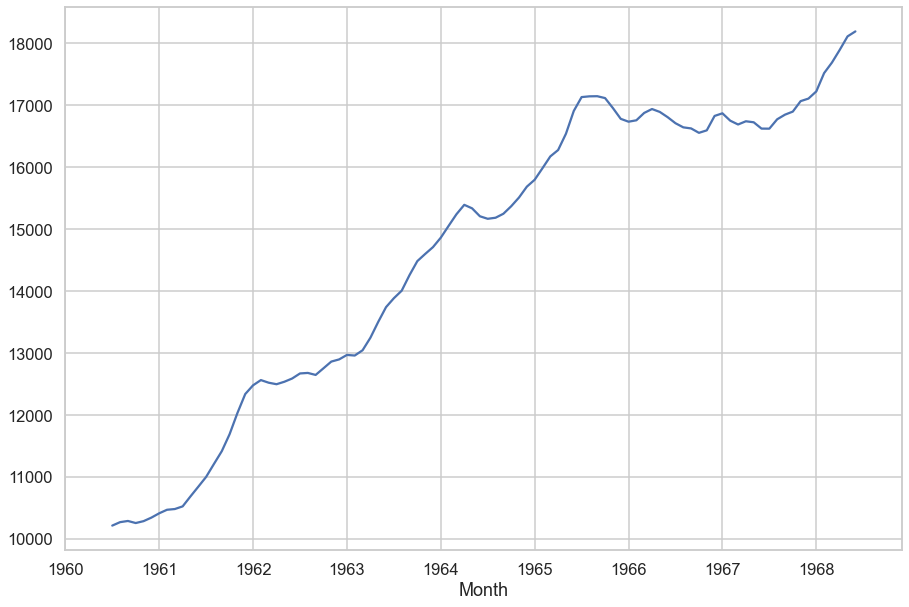

In [8]:
result.trend.plot()

<AxesSubplot:xlabel='Month'>

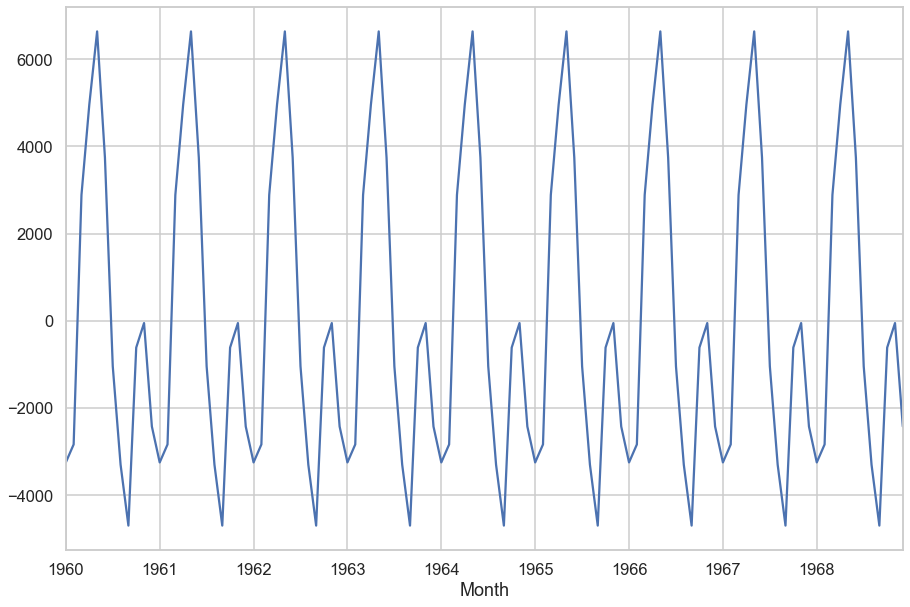

In [9]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

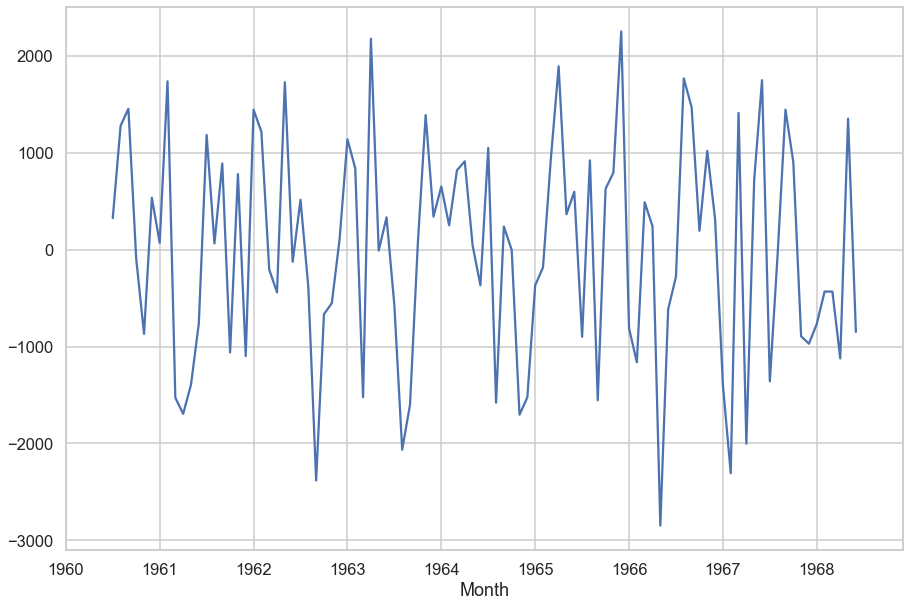

In [10]:
result.resid.plot()

In [12]:
df['diff']=df['Sales'].diff()

In [13]:
from plotly.graph_objects import *
from plotly.offline import init_notebook_mode,iplot
from plotly.graph_objects import Scatter
from plotly.graph_objects import Figure
from plotly.graph_objects import Layout

trace1 = Scatter(x=df['Month'],y=df['Sales'],name='Original data')
trace2 = Scatter(x=df['Month'],y=df['diff'],name='Differencing')
iplot(Figure(data=[trace1, trace2],
            layout = Layout(paper_bgcolor='rgba(0,0,0,0)')))

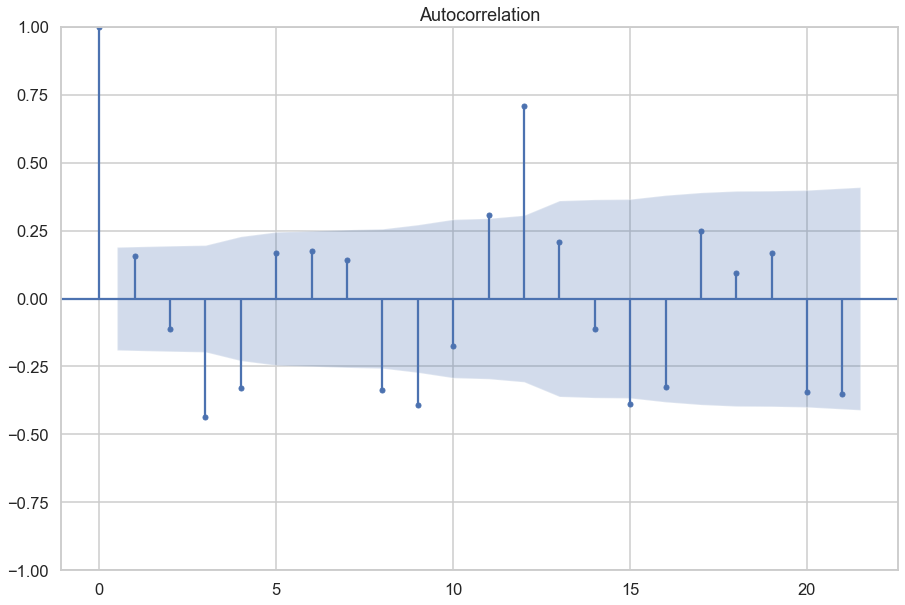

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['diff'].dropna())
pyplot.show()

In [14]:
for i in range(1, 25):
    df[f'lag-{i}'] = df['Sales'].shift(i)

In [15]:
df[[f'lag-{i}' for i in range(1, 25)] + ['Sales']].corr()['Sales']

lag-1     0.728068
lag-2     0.367645
lag-3     0.076004
lag-4     0.030571
lag-5     0.170231
lag-6     0.213944
lag-7     0.146070
lag-8    -0.011016
lag-9     0.020582
lag-10    0.308732
lag-11    0.709073
lag-12    0.919575
lag-13    0.677495
lag-14    0.297376
lag-15   -0.005054
lag-16   -0.047302
lag-17    0.134608
lag-18    0.143660
lag-19    0.084718
lag-20   -0.107669
lag-21   -0.065315
lag-22    0.255275
lag-23    0.686575
lag-24    0.888039
Sales     1.000000
Name: Sales, dtype: float64

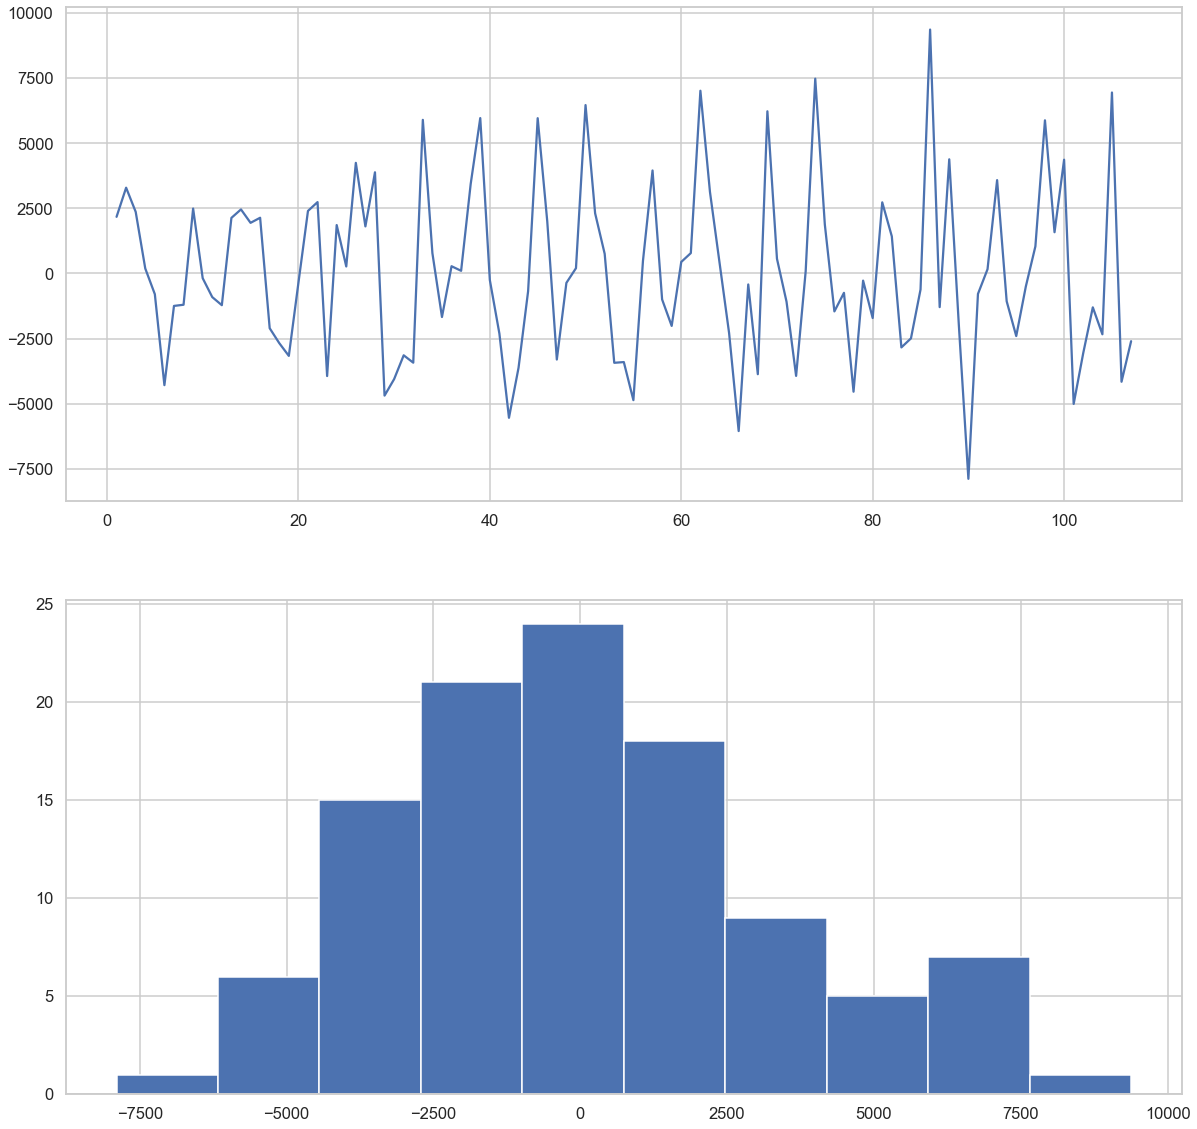

In [16]:
df['diff']=df['Sales'].diff()

pyplot.figure(1, figsize = (20,20))

# line plot
pyplot.subplot(211)
pyplot.plot(df['diff'])

# histogram
pyplot.subplot(212)
pyplot.hist(df['diff'])
pyplot.show()

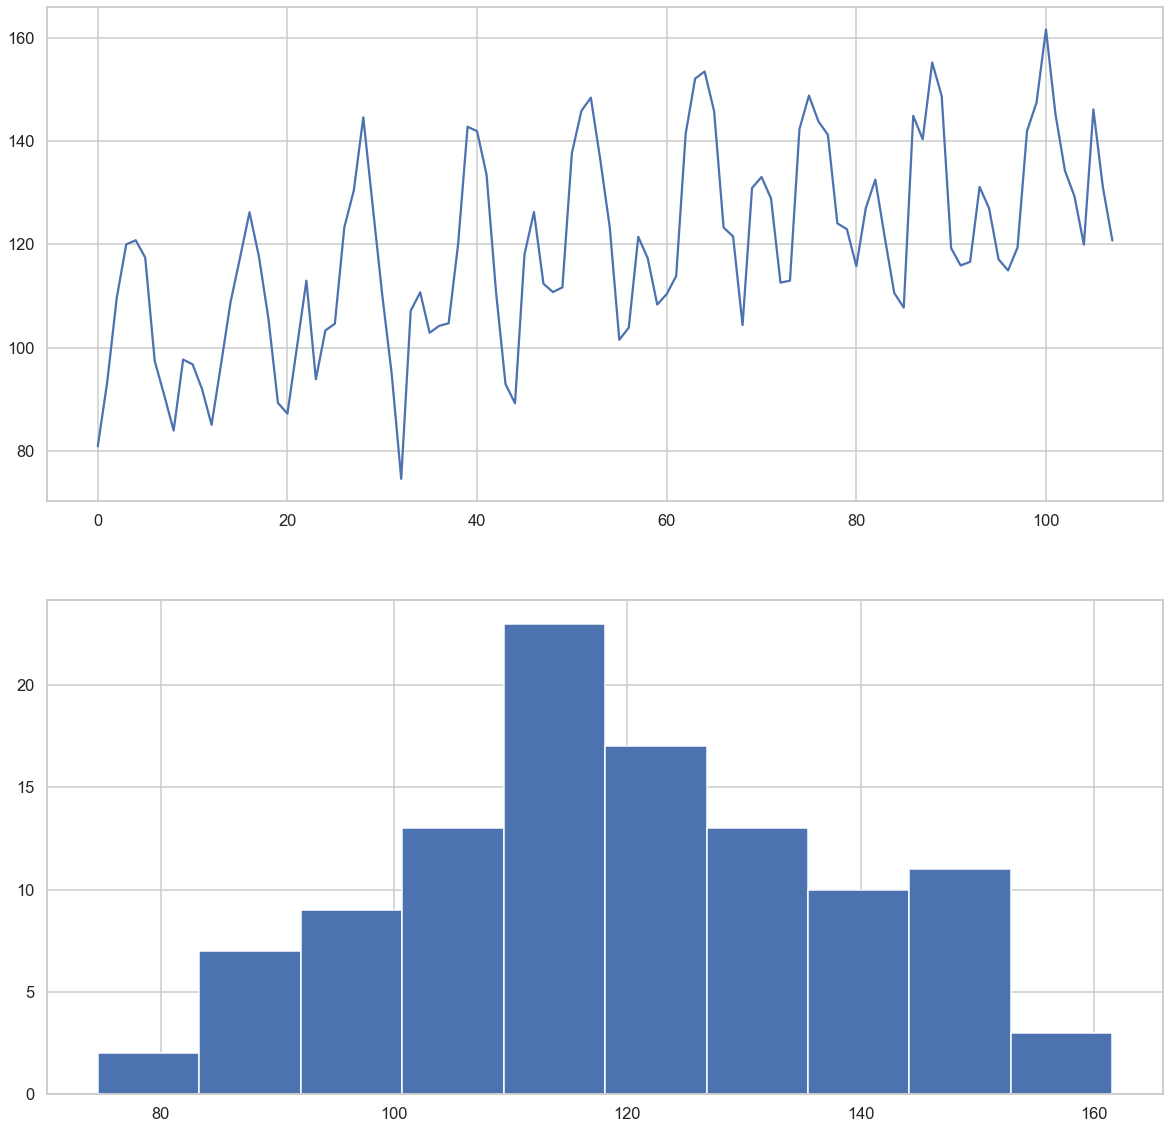

In [17]:
df['sqrt']= np.sqrt(df['Sales'])

pyplot.figure(1, figsize = (20,20))

# line plot
pyplot.subplot(211)
pyplot.plot(df['sqrt'])

# histogram
pyplot.subplot(212)
pyplot.hist(df['sqrt'])
pyplot.show()

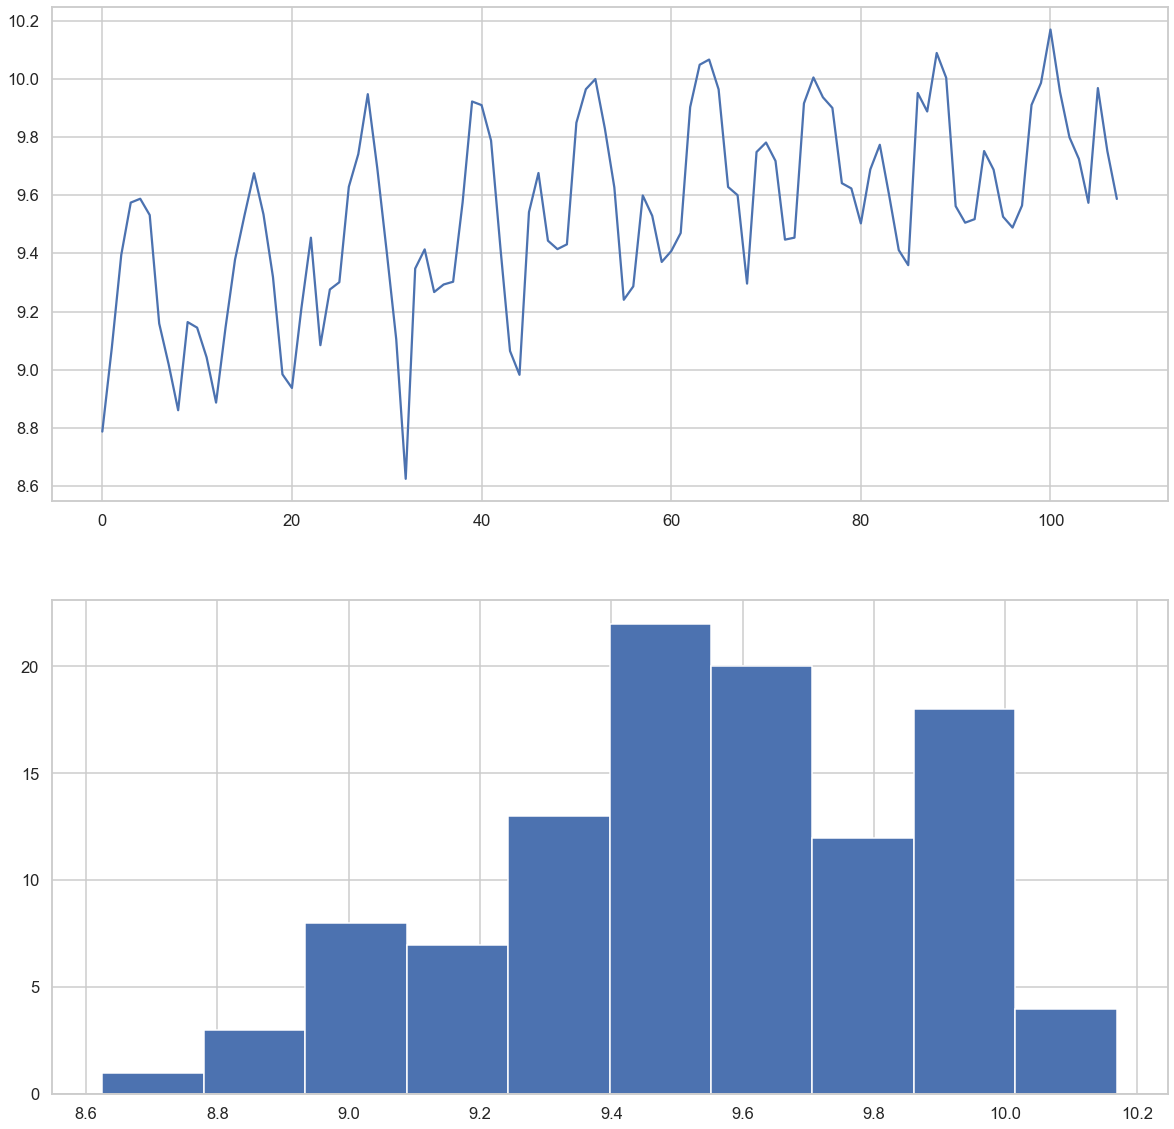

In [18]:
df['log']= np.log(df['Sales'])

pyplot.figure(1, figsize = (20,20))

# line plot
pyplot.subplot(211)
pyplot.plot(df['log'])

# histogram
pyplot.subplot(212)
pyplot.hist(df['log'])
pyplot.show()

Lambda: 0.4581437124016079


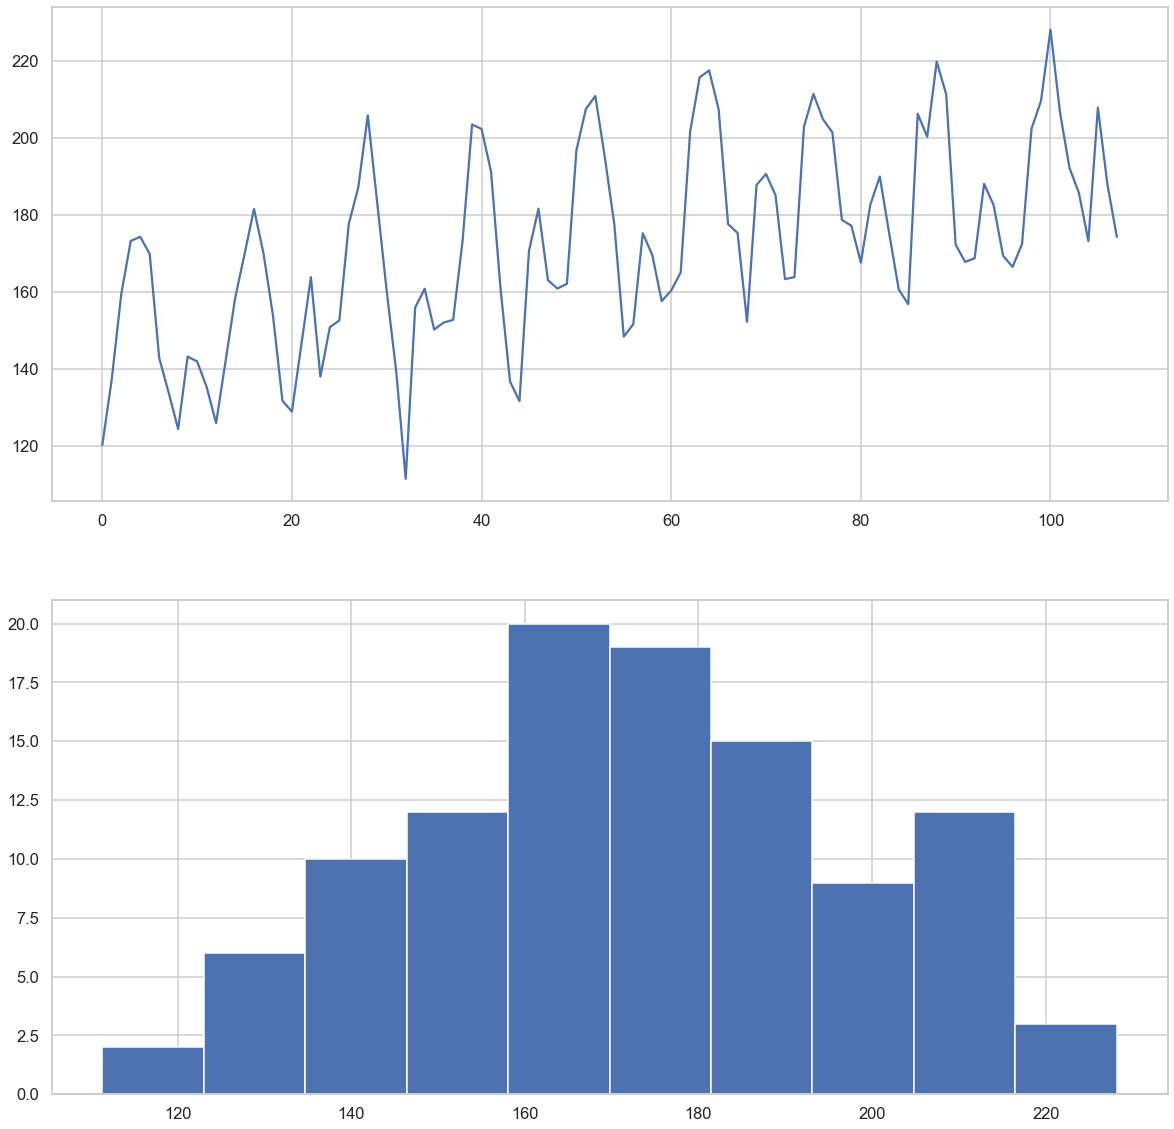

In [19]:
from scipy.stats import boxcox

df['sqrt']= boxcox(df['Sales'])[0]
print('Lambda:', boxcox(df['Sales'])[1])

pyplot.figure(1, figsize = (20,20))

# line plot
pyplot.subplot(211)
pyplot.plot(df['sqrt'])

# histogram
pyplot.subplot(212)
pyplot.hist(df['sqrt'])
pyplot.show()

In [14]:
df = pd.read_csv('monthly-car-sales.csv')
s = pd.Series(index = pd.to_datetime(df['Month']), data = df['Sales'].values)
train, test = s[0:-23], s[-23:]

In [23]:
model = ARIMA(train, order=(12, 2, 12))
model_fit = model.fit()
print(model_fit.summary())

# from pmdarima.arima import auto_arima

# SARIMA_model = auto_arima(train, start_p=1, start_q=1, 
#                          test='adf', 
#                          m=12, 
#                          start_P=0, 
#                          seasonal=True, 
#                          d=None, 
#                          D=1, 
#                          trace=False, 
#                          error_action='ignore', 
#                          suppress_warnings=True,
#                          stepwise=True)

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               ARIMA(12, 2, 12)   Log Likelihood                -726.866
Date:                Sun, 26 Jun 2022   AIC                           1503.731
Time:                        11:15:55   BIC                           1564.202
Sample:                    01-01-1960   HQIC                          1528.025
                         - 01-01-1967                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7375      0.373     -1.975      0.048      -1.469      -0.006
ar.L2         -1.0574      0.402     -2.628      0.009      -1.846      -0.269
ar.L3         -0.8320      0.385     -2.160      0.0

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



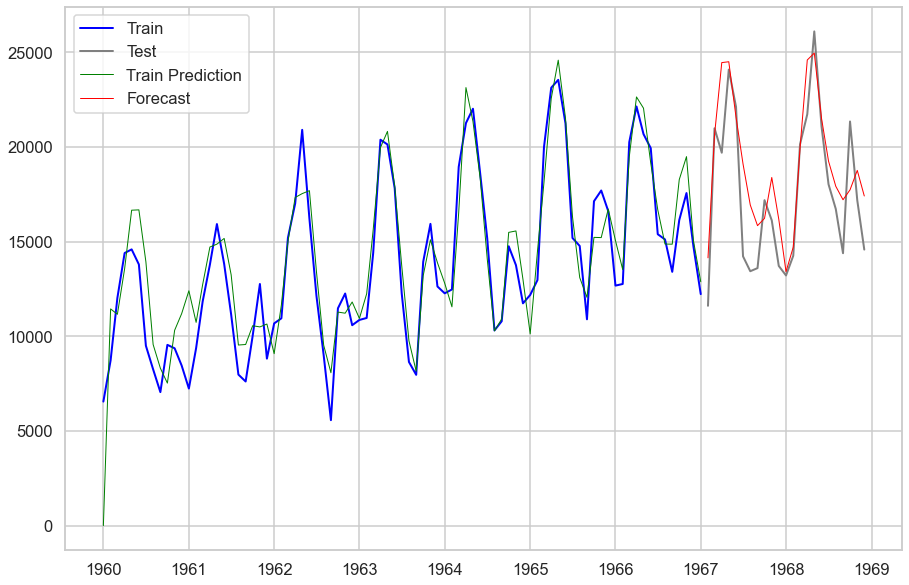

In [26]:
predictions = model_fit.predict()
forecast = model_fit.forecast(len(test))
fig, ax = pyplot.subplots()
ax.plot(train, linewidth = 2, color='blue',label = 'Train')
ax.plot(test, linewidth = 2, color = 'grey', label ='Test')
ax.plot(predictions, linewidth = 1, color = 'green', label ='Train Prediction')
ax.plot(forecast, linewidth = 1, color = 'red', label ='Forecast')
ax.legend()
pyplot.show()

In [28]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-test)[1]                      # ACF1
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse, 'ACF1':acf1, 
            'CORR':corr, 'MINMAX':minmax})

forecast_accuracy(forecast, test.values)

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_12475/1663133432.py:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_12475/1663133432.py:10: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



{'MAPE': 0.11770591141958396,
 'ME': 1297.4593308972082,
 'MAE': 1890.0247715320177,
 'MPE': 0.08984772058312075,
 'RMSE': 2352.5643038869102,
 'ACF1': -0.2333326724908393,
 'CORR': 0.8640009132705085,
 'MINMAX': 0.10059517468843593}